In [ ]:
pip install pandas nltk scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv("E:\\125156131\\IMDB Dataset - IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df['review'] = df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['review'] = df['review'].apply(lambda x: ' '.join(x))


0        [one, of, the, other, reviewers, has, mentione...
1        [a, wonderful, little, production, br, br, the...
2        [i, thought, this, was, a, wonderful, way, to,...
3        [basically, there, s, a, family, where, a, lit...
4        [petter, mattei, s, love, in, the, time, of, m...
                               ...                        
49995    [i, thought, this, movie, did, a, down, right,...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, am, a, catholic, taught, in, parochial, el...
49998    [i, m, going, to, have, to, disagree, with, th...
49999    [no, one, expects, the, star, trek, movies, to...
Name: review, Length: 50000, dtype: object


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

Accuracy: 0.8488
              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      4961
    positive       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



<AxesSubplot:>

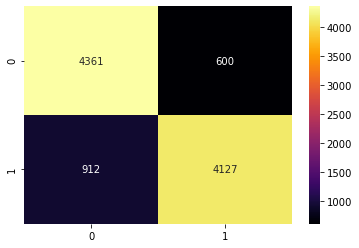

In [ ]:
y_pred = nb_classifier.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="inferno")